In [1]:
#!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import time
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
test = pd.read_csv('./data/test.csv')

In [4]:
df = pd.read_pickle('./data/data_3.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8029111 entries, 827196 to 8856306
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   month_id                     int8   
 1   shop_id                      int8   
 2   item_id                      int16  
 3   cnt_month                    float32
 4   city_id                      int8   
 5   cat_id                       int8   
 6   main_cat                     int8   
 7   sub_cat                      int8   
 8   year                         int16  
 9   month                        int8   
 10  sales_month                  int8   
 11  cnt_month_1                  float32
 12  cnt_month_2                  float32
 13  cnt_month_3                  float32
 14  cnt_month_6                  float32
 15  cnt_month_12                 float32
 16  item_id_mean_cnt_1           float32
 17  item_id_mean_cnt_2           float32
 18  item_id_mean_cnt_3           float32


In [6]:
df.head()

,month_id,shop_id,item_id,cnt_month,city_id,cat_id,main_cat,sub_cat,year,month,...,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,item_id/city_id_mean_cnt_6,item_id/city_id_mean_cnt_12,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3,shop_id/cat_id_mean_cnt_6,shop_id/cat_id_mean_cnt_12
827196,3,25,8092,3.0,13,40,11,6,2013,4,...,1.000000,2.142857,0.0,0.0,0.0,1.087262,1.049296,0.0,0.0,0.0
827197,3,25,7850,3.0,13,30,8,54,2013,4,...,3.714286,2.285714,0.0,0.0,0.0,3.654494,2.279188,0.0,0.0,0.0
827198,3,25,8051,3.0,13,66,14,47,2013,4,...,0.000000,0.428571,0.0,0.0,0.0,1.827586,1.389474,0.0,0.0,0.0
827199,3,25,8088,1.0,13,55,13,4,2013,4,...,0.285714,0.000000,0.0,0.0,0.0,0.599845,0.562107,0.0,0.0,0.0
827200,3,25,8089,1.0,13,55,13,4,2013,4,...,0.571429,0.000000,0.0,0.0,0.0,0.599845,0.562107,0.0,0.0,0.0


In [7]:
df.columns

Index(['month_id', 'shop_id', 'item_id', 'cnt_month', 'city_id', 'cat_id',
       'main_cat', 'sub_cat', 'year', 'month', 'sales_month', 'cnt_month_1',
       'cnt_month_2', 'cnt_month_3', 'cnt_month_6', 'cnt_month_12',
       'item_id_mean_cnt_1', 'item_id_mean_cnt_2', 'item_id_mean_cnt_3',
       'item_id_mean_cnt_6', 'item_id_mean_cnt_12', 'sub_cat_mean_cnt_1',
       'sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'sub_cat_mean_cnt_6',
       'sub_cat_mean_cnt_12', 'price_mean_mean_cnt_1', 'price_mean_mean_cnt_2',
       'price_mean_mean_cnt_3', 'price_mean_mean_cnt_6',
       'price_mean_mean_cnt_12', 'item_id/city_id_mean_cnt_1',
       'item_id/city_id_mean_cnt_2', 'item_id/city_id_mean_cnt_3',
       'item_id/city_id_mean_cnt_6', 'item_id/city_id_mean_cnt_12',
       'shop_id/cat_id_mean_cnt_1', 'shop_id/cat_id_mean_cnt_2',
       'shop_id/cat_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_6',
       'shop_id/cat_id_mean_cnt_12'],
      dtype='object')

In [8]:
s = ['cnt_month','cnt_month_1','cnt_month_2', 'cnt_month_3', 'cnt_month_6', 'cnt_month_12',
     'item_id_mean_cnt_1', 'item_id_mean_cnt_2', 'item_id_mean_cnt_3', 'item_id_mean_cnt_6', 'item_id_mean_cnt_12', 
     'sub_cat_mean_cnt_1', 'sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'sub_cat_mean_cnt_6', 'sub_cat_mean_cnt_12', 
     'price_mean_mean_cnt_1', 'price_mean_mean_cnt_2','price_mean_mean_cnt_3', 'price_mean_mean_cnt_6','price_mean_mean_cnt_12',
     'item_id/city_id_mean_cnt_1', 'item_id/city_id_mean_cnt_2', 'item_id/city_id_mean_cnt_3','item_id/city_id_mean_cnt_6', 'item_id/city_id_mean_cnt_12',
     'shop_id/cat_id_mean_cnt_1', 'shop_id/cat_id_mean_cnt_2','shop_id/cat_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_6','shop_id/cat_id_mean_cnt_12']

In [9]:
# value clip(0~20)
df[s] = df[s].clip(0, 20)

In [10]:
# train/validation/test data split
X_train = df[df['month_id'] < 33].drop(['cnt_month'], axis=1)
Y_train = df[df['month_id'] < 33]['cnt_month']

X_valid = df[df['month_id'] == 33].drop(['cnt_month'], axis=1)
Y_valid = df[df['month_id'] == 33]['cnt_month']

X_test = df[df['month_id'] == 34].drop(['cnt_month'], axis=1)

In [11]:
model = CatBoostRegressor(iterations=500,
                          max_ctr_complexity=4,
                          random_seed=0,
                          od_type='Iter',
                          od_wait=25,
                          verbose=50,
                          depth=4
                         )

In [12]:
ts = time.time()

model.fit(
    X_train, Y_train, 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)],  # 유효성 검사 데이터 세트
    )

print('소요시간: ',time.time()-ts)

Learning rate set to 0.316046
0:	learn: 1.1172189	test: 1.1172189	test1: 0.9927461	best: 0.9927461 (0)	total: 1.12s	remaining: 9m 17s
50:	learn: 0.9011064	test: 0.9011064	test1: 0.8342765	best: 0.8342765 (50)	total: 51.1s	remaining: 7m 29s
100:	learn: 0.8859987	test: 0.8859987	test1: 0.8252328	best: 0.8251274 (98)	total: 1m 42s	remaining: 6m 43s
150:	learn: 0.8765409	test: 0.8765409	test1: 0.8171220	best: 0.8168459 (144)	total: 2m 33s	remaining: 5m 55s
200:	learn: 0.8710610	test: 0.8710610	test1: 0.8132285	best: 0.8131482 (196)	total: 3m 24s	remaining: 5m 4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.8130080195
bestIteration = 201

Shrink model to first 202 iterations.
소요시간:  238.80328464508057


In [13]:
model.get_feature_importance(Pool(X_train, label=Y_train, cat_features=[]))

array([8.69449089e-01, 2.26089202e+00, 1.20694663e+00, 1.79091423e+00,
       1.00224887e+01, 7.19854501e-01, 3.46051441e+00, 6.48792175e-02,
       3.36764015e+00, 1.24020647e+01, 3.21792125e+01, 5.28938177e+00,
       1.48725198e+00, 1.85309855e-01, 1.53037090e-02, 1.03756069e+01,
       5.06823223e-01, 1.85711957e-01, 4.03039606e-02, 2.45755771e-02,
       2.14324982e+00, 2.43589310e-01, 1.93699889e-01, 6.95190907e-02,
       2.67375877e-02, 5.23343725e-01, 3.38741561e-01, 1.26801634e-01,
       4.89708521e-02, 0.00000000e+00, 1.37339346e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.54990692e+00,
       7.53109653e-01, 1.53811466e-01, 0.00000000e+00, 0.00000000e+00])

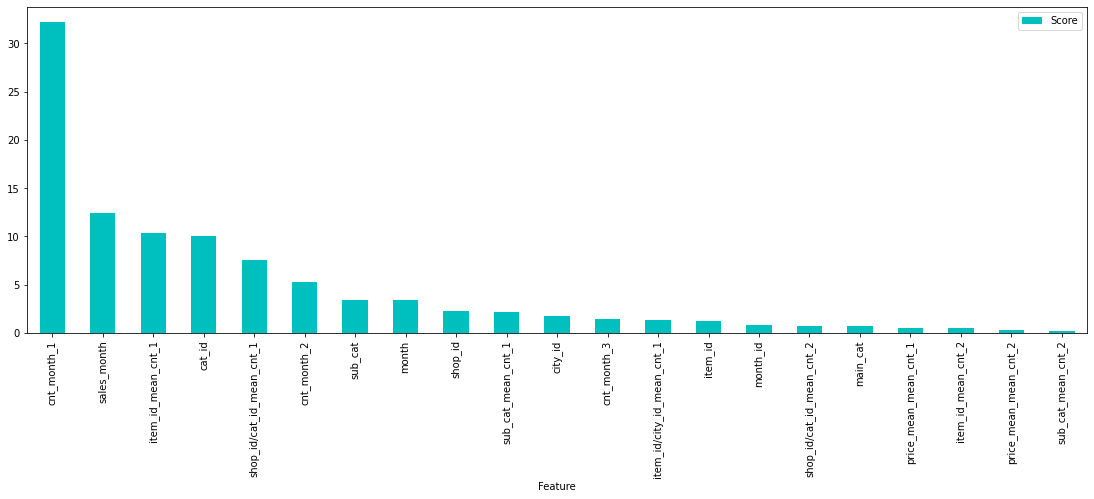

In [20]:
feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, model.get_feature_importance(Pool(X_train, label=Y_train, cat_features=[])))), columns=['Feature','Score'])
feature_score = feature_score[feature_score.Score > 0.2]
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (19, 6)
feature_score.plot('Feature', 'Score', kind='bar', color='c')

plt.show()


In [15]:
Y_pred = model.predict(X_valid)

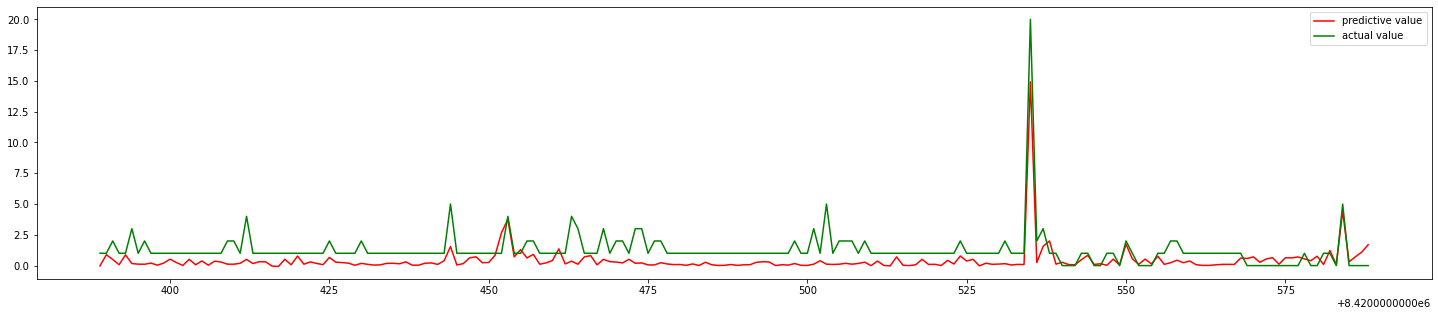

In [16]:
submission = pd.DataFrame({
    "ID": X_valid.index, 
    "item_cnt_month": Y_pred
})
x = submission['ID'].head(200)
y_pred = submission['item_cnt_month'].head(200)
y_true = Y_valid.head(200)
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
ax.plot(x, y_pred, label = 'predictive value', color = 'red')
ax.plot(x, y_true, label = 'actual value', color = 'green')

ax.legend()

plt.show()

In [17]:
Y_test = model.predict(X_test)

In [18]:
# 제출 파일 생성
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('./submission/submission_CatBoost_2022030101.csv', index=False)